# Time Series hands on AIrPassengers

MACHINE LEARNING PROJECT ON AIR PASSENGERS DATASET

In [ ]:
#The Dataset contains the monthly passenger data from January 1949 to December 1960. 

In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Loading or improting the dataset
#data=pd.read_csv(r'C:\Users\Dell\Downloads\AirPassengers.csv')

In [2]:
# improting the dataset   #(it can be done as above also)
data=pd.read_csv('AirPassengers.csv')

In [3]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
# first 5 rows of data
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
# data that is dependent on time--> timeseries data
data.info() # to get the overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
# checking for NaN values
data.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [7]:
data["Month"]

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

In [8]:
#Convert Month as it is in int format to date-time format using "to_datetime()"
data['Month'] = pd.to_datetime(data['Month'])

In [9]:
data["Month"]

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [10]:
#Check data types after month format conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [12]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
#TIME SERIES VISUALIZATION

In [13]:
data.index

RangeIndex(start=0, stop=144, step=1)

In [14]:
data.index = data['Month']
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [15]:
del data['Month']
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

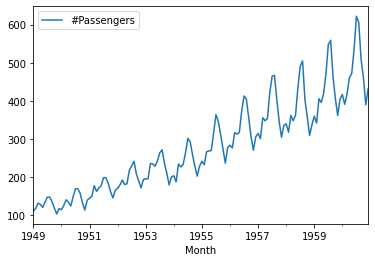

In [18]:
data.plot()
plt.show()
# data is not stationary
# it has trend -> long-term increase or decrease in the data. It can be linear or exponential or change direction over time
# it has seasonality-> repeating cycle in the series with fixed frequencies

How do i know for sure if my data is stationary?

-> constant mean

-> constant variance

-> an auto-covariance that doesn't depend on time

Tests for Stationary
- Ad-fuller test (Augmented Dickey-Fuller test)
- KPSS test( Kwiatkowski–Phillips–Schmidt–Shin test)

In [ ]:
#TIME SERIES ANALYSIS

Checking the stationarity of the data  
-> the statistical properties of a process generating a time series do not change over time 


Thus, time series with trends,or with seasonality, are not stationary 

->  the trend and seasonality will affect the value of the time series at different times.


In [ ]:
#Rolling means creating a rolling window with a specified size and perform calculations on
# the data in this window which, of course, rolls through the data

In [21]:
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()

Text(0.5, 1.0, 'Rolling Mean and Standard Deviationa -- Logarithm Scale')

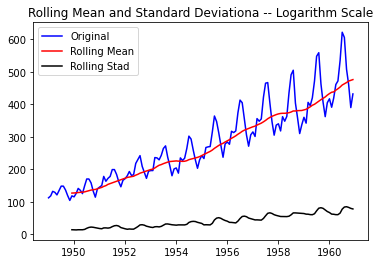

In [22]:
plt.plot(data, color='blue', label = 'Original')
plt.plot(mean_log, color='red', label = 'Rolling Mean')
plt.plot(std_log, color='black', label = 'Rolling Stad')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviationa -- Logarithm Scale')

In [ ]:
#STATIONARITY IN TIME SERIES

In [23]:
from statsmodels.tsa.stattools import adfuller
#p-value > 0.05: ---> not stationary -> Null Hyp
#p-value <= 0.05: --> stationary-> Alternate Hyp
result = adfuller(data['#Passengers'])
#print(result)
#print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
	#print('\t%s: %.3f' % (key, value))
if result[1]>0.05:
	print('not stationary')
else:
	print("stationary")


p-value: 0.991880
not stationary


In [25]:
adfuller(data['#Passengers'])

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [20]:
# adfuller --> p<0.05 ---> stationary
# kpss ------> p>0.05 ---> stationary

In [26]:
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values=kpss(data['#Passengers'])
if p>0.05:
  print('stationary')
else:
  print("not stationary")
print(p)

not stationary
0.01


C:\Users\sowmy\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).


 The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).

Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.



In [ ]:
#Removing Trends and Seasonality 

In [ ]:
#Trend is a pattern in data that shows the movement of a series to relatively higher or lower values over 
#a long period of time

<AxesSubplot:title={'center':'Original Values'}, xlabel='Month'>

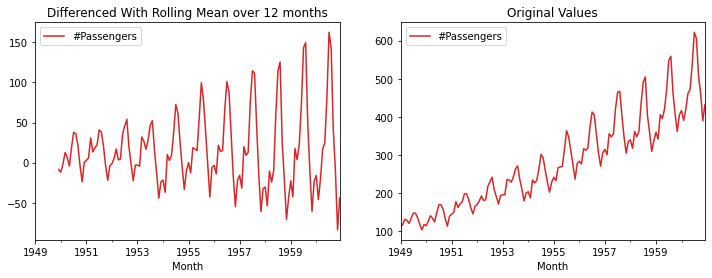

In [27]:
#removing trend using the rolling mean differencing 

rolling_mean = data.rolling(window=12).mean()

#Rolling averages are useful for finding long-term trends otherwise disguised by occasional fluctuations. 
rolling_mean_detrended = data - rolling_mean

ax1 = plt.subplot(121)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red", 
                            title="Differenced With Rolling Mean over 12 months", 
                            ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4), 
          color="tab:red", 
          title="Original Values", 
          ax=ax2)

In [ ]:
#SEASONAL DECOMPOSE

#We can check the trend and seasonality using the seasonal_decompose() method.

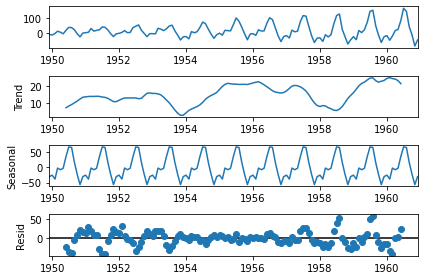

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(rolling_mean_detrended.dropna())
decompose_result.plot();


# Here we can see the decomposed structure of data and the structure of the components in the data set which were affecting it.

In [29]:
rolling_mean_detrended.head(24)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


<AxesSubplot:title={'center':'Differenced With Rolling Mean over 12 months'}, xlabel='Month'>

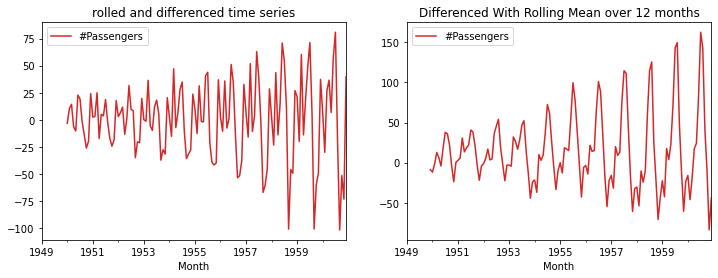

In [30]:
# removing seasonality from the time series
# shift()->for shifting the index by the desired number of periods with an optimal time frequency
rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift()

ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                 color="tab:red", 
                                 title="rolled and differenced time series", 
                                 ax=ax1)
ax1 = plt.subplot(122)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red", 
                            title="Differenced With Rolling Mean over 12 months", 
                            ax=ax1)

In [31]:
rolling_mean_detrended_diff

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,-19.916667
1960-09-01,-101.750000
1960-10-01,-51.500000


In [32]:
rolling_mean_detrended.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [33]:
rolling_mean_detrended.shift().head(13)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [29]:
rolling_mean_detrended.shift(2).head(24)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [34]:
rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()

In [35]:
rolling_mean_detrended_diff

,#Passengers
Month,
1950-01-01,-3.250000
1950-02-01,10.333333
1950-03-01,14.250000
1950-04-01,-6.500000
1950-05-01,-10.333333
...,...
1960-08-01,-19.916667
1960-09-01,-101.750000
1960-10-01,-51.500000


<AxesSubplot:title={'center':'Original Values'}, xlabel='Month'>

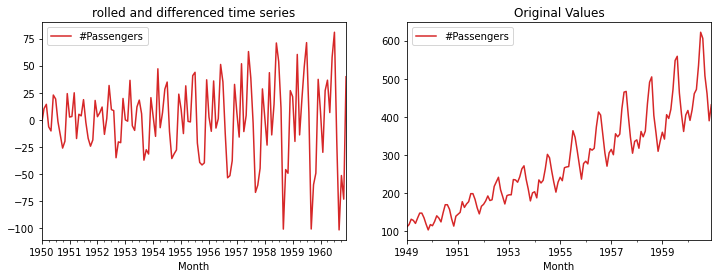

In [36]:
ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                 color="tab:red", 
                                 title="rolled and differenced time series", 
                                 ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4), 
          color="tab:red", 
          title="Original Values",
          ax=ax2)

In [37]:
rolling_mean_detrended_diff

,#Passengers
Month,
1950-01-01,-3.250000
1950-02-01,10.333333
1950-03-01,14.250000
1950-04-01,-6.500000
1950-05-01,-10.333333
...,...
1960-08-01,-19.916667
1960-09-01,-101.750000
1960-10-01,-51.500000


In [38]:
result = adfuller(rolling_mean_detrended_diff['#Passengers'].dropna())
#print(result)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.154483
p-value: 0.022775
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


Running the example shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

In [39]:
dftest = adfuller(rolling_mean_detrended_diff['#Passengers'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val) 

1. ADF :  -3.1544826348635455
2. P-Value :  0.022775264967861194
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


Here in differencing overpower transformed time series, we have got a good p-value near about 0.02 and lower than 0.05 in that we can consider our data is stationary. 

In [ ]:
#AUTOCORRELATION

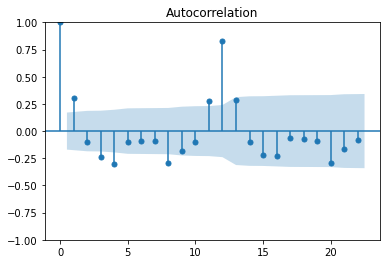

In [40]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
#To check for the stationarity of the time series,
# statsmodels provides a plot_acf method to plot an autocorrelation plot.
plot_acf(rolling_mean_detrended_diff['#Passengers']);


C:\Users\sowmy\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


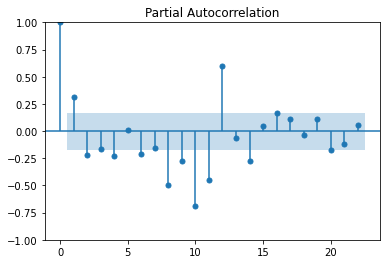

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(rolling_mean_detrended_diff['#Passengers']);

In [42]:
!pip install pmdarima


In [43]:
from pmdarima import auto_arima

In [44]:
order = auto_arima(rolling_mean_detrended_diff['#Passengers'], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1314.475, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1303.387, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1298.888, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1312.483, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1295.760, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1297.960, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.290, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1293.760, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1296.888, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1301.389, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -610.892
Date:                Sat, 25 May 2024   AIC                           1235.785
Time:                        15:36:17   BIC                           1255.964
Sample:                    01-01-1950   HQIC                          1243.985
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8644      0.162      5.347      0.000       0.548       1.181
ar.L2          0.2042      0.230      0.889      0.374      -0.246       0.654
ar.L3         -0.5266      0.140     -3.773      0.000      -0.800      -0.253
ma.L1         -0.9137      0.128     -7.155      0.000      -1.164      -0.663
ma.L2         -0.8209      0.168     -4.885      0.000      -1.150      -0.492
ma.L3          0.7469      0.095      7.852      0.000       0.560       0.933
sigma2       586.1877     67.803      8.645      0.000     453.296     719.079
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.72   Prob(JB):                         0.28
Heteroskedasticity (H):               6.24   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
#!pip uninstall statsmodels


In [46]:
! pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA

In [48]:
train = rolling_mean_detrended_diff.iloc[:120]['#Passengers']
test = rolling_mean_detrended_diff.iloc[121:]['#Passengers']
# ARIMA ---> AR + MA +I ---> ARIMA--> 3= AR , I=0 , MA=3
model = ARIMA(train, order=(3,0,3))
model_fit = model.fit() # training 
model_fit.summary()

C:\Users\sowmy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sowmy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sowmy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sowmy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sowmy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -546.713
Date:                Sat, 25 May 2024   AIC                           1109.427
Time:                        15:37:56   BIC                           1131.727
Sample:                    01-01-1950   HQIC                          1118.483
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0651      0.040      1.628      0.103      -0.013       0.143
ar.L1          0.7920      0.116      6.838      0.000       0.565       1.019
ar.L2          0.3299      0.133      2.481      0.013       0.069       0.591
ar.L3         -0.5814      0.077     -7.572      0.000      -0.732      -0.431
ma.L1         -0.8686      2.521     -0.345      0.730      -5.809       4.072
ma.L2         -0.9992      2.280     -0.438      0.661      -5.467       3.469
ma.L3          0.8680      2.681      0.324      0.746      -4.388       6.124
sigma2       484.2797   1565.801      0.309      0.757   -2584.634    3553.193
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.97   Prob(JB):                         0.92
Heteroskedasticity (H):               5.91   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\sowmy\AppData\Local\Temp\ipykernel_19392\583994661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_mean_detrended_diff['predict'] = model_fit.predict(start= len(train),


<AxesSubplot:xlabel='Month'>

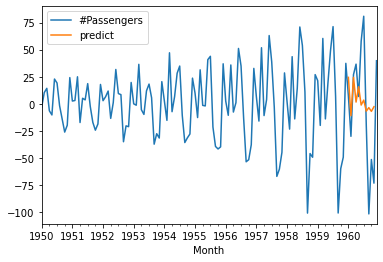

In [49]:
rolling_mean_detrended_diff['predict'] = model_fit.predict(start= len(train), 
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

In [ ]:
#SEASONAL ARIMA MODEL

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12),enforce_stationarity=False)
model=model.fit()

C:\Users\sowmy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sowmy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\sowmy\AppData\Local\Temp\ipykernel_19392\3222869760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_mean_detrended_diff['predict'] = model.predict(start= len(train) ,


<AxesSubplot:xlabel='Month'>

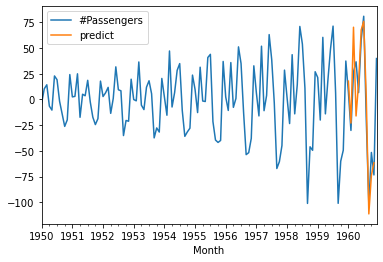

In [51]:
rolling_mean_detrended_diff['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

<AxesSubplot:xlabel='Month'>

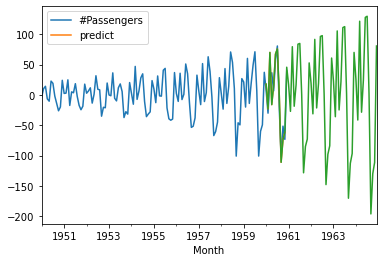

In [52]:
#predicting the projections for the next 5 years

forecast = model.forecast(steps=60)
rolling_mean_detrended_diff.plot()
forecast.plot()

In [53]:
type(forecast)

pandas.core.series.Series